<a href="https://colab.research.google.com/github/gyeongdong13/Study/blob/main/CNN_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Keras를 활용한 CNN 실습 2

In [ ]:
import numpy as np
import pandas as pd

1. 데이터 불러오기

In [ ]:
from tensorflow.keras.datasets import cifar10

# 전체 6만개 데이터 중, 5만개는 학습 데이터용, 1만개는 테스트 데이터용으로 분리
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

# 사진의 크기는 32 * 32이며, RGB로 3차원으로 구성된 것을 알 수 있음 (데이터개수, 크기, 크기, 차원)

170498071/170498071 [==============================] - 5s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


2. CIFAR10 데이터 확인하기(컬러 이미지)

In [ ]:
# 첫번째 이미지 확인

train_images[0, :, :, :], train_labels[0, :]

(array([[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],
 
        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],
 
        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],
 
        ...,
 
        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],
 
        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],
 
        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
  

In [ ]:
#미리 라벨링을 이름으로 지정
NAMES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
print(train_labels[:10])

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


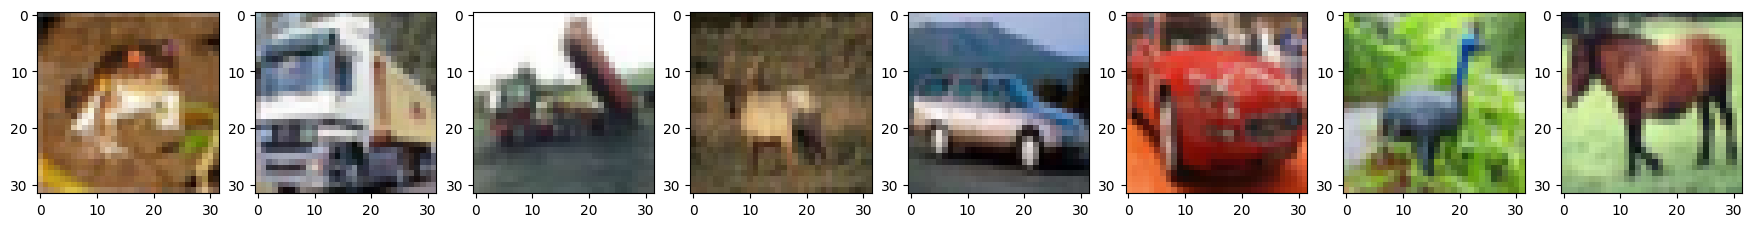

In [ ]:
# 사진으로 데이터 확인

import matplotlib.pyplot as plt

ncols = 8

figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)

for i in range(ncols):
    axs[i].imshow(train_images[i], cmap='gray')

3. CIFAR10 데이터 전처리

In [ ]:
# 0 ~ 255 사이의 값으로 되어 있는 pixel intensity 값을 0 ~ 1 사이 값으로 변환(표준화)
# label array는 숫자형 값으로 바꾸되, 원-핫 인코딩을 적용할지 선택. 일반적으로 원-핫 인코딩을 적용하는게 Keras Framework활용이 용이
# image array, label array 모두 float32 형으로 변환

In [ ]:
# 이미지 값 변환
train_images_2 = np.array(train_images/255.0, dtype=np.float32)
test_images_2 = np.array(test_images/255.0, dtype=np.float32)
# keras의 딥러닝을 사용하기 위해서는 dtype을 np.float32로 설정해야 함

# 라벨 값 변환
train_labels_2 = np.array(train_labels, dtype=np.float32)
test_labels_2 = np.array(test_labels, dtype=np.float32)

In [ ]:
train_images_2[0,:,:,:] #0에서 1사이로 값이 변한 것 확인가능

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [ ]:
test_labels_2 # 이차원 데이터

test_labels_2.shape

(10000, 1)

In [ ]:
# 이번에는 MNIST와 다르게 레이블 인코딩 방식으로 출력값을 변환

# 2차원인 labels 데이터를 1차원으로 변경.
train_labels_2 = train_labels_2.squeeze()
test_labels_2 = test_labels_2.squeeze()

train_labels_2.shape, train_labels_2.shape

((50000,), (50000,))

In [ ]:
train_labels_2 # 2차원 데이터가 1차원 데이터로 변화된 것을 확인

train_labels_2.shape

(50000,)

In [ ]:
from sklearn.model_selection import train_test_split

train_x, val_x, train_y, val_y = train_test_split(train_images_2, train_labels_2, test_size=0.3, random_state=1)

In [ ]:
train_x.shape, val_x.shape, train_y.shape, val_y.shape

((35000, 32, 32, 3), (15000, 32, 32, 3), (35000,), (15000,))

4. CNN 모델 생성 및 손실/최적함수 설정

In [ ]:
# CNN Model의 맨처음 Layer는 Input layer. Input layer의 shape를 이미지 사이즈와 RGB 3채널에 맞게 (32, 32, 3) 으로 설정

# Conv->Conv->MaxPooling을 적용하는 루틴으로 모델 생성. MaxPooling을 적용 후에는 필터 갯수를 더욱 증가 시킴
# ->즉, MaxPooling 적용 후에 출력 피처맵의 사이즈는 작아지되, 채널(깊이)는 늘어나는 형태로 모델 생성

# label값이 원-핫 인코딩 되지 않았기 때문에 model.compile()에서 loss는 반드시 sparse_categorical_crossentropy여야함
# 만일 label값이 원-핫 인코딩 되었다면 loss는 categorical_crossentropy

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , MaxPooling2D

In [ ]:
input_layer = Input(shape=(32, 32, 3)) # 컬러 이미지
# input_layer = input(shape=(28,28)) # 흑백 이미지

conv_layer_1 = Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(input_layer) # stride는 기본값 1
conv_layer_1 = Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(conv_layer_1)
conv_layer_1 = MaxPooling2D(pool_size=2)(conv_layer_1)

conv_layer_2 = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(conv_layer_1)
conv_layer_2 = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(conv_layer_2)
conv_layer_2 = MaxPooling2D(pool_size=2)(conv_layer_2)

conv_layer_3 = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(conv_layer_2)
conv_layer_3 = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(conv_layer_3)
conv_layer_3 = MaxPooling2D(pool_size=2)(conv_layer_3)
# 보통 필터의 개수는 2배씩 증가하는 것이 일반적

# cifar10의 클래스가 10개 이므로 마지막 classification의 Dense layer는 10으로 설정
output_layer = Flatten(name='flatten')(conv_layer_3)
output_layer = Dense(100, activation='relu')(output_layer) # 몇만개의 데이터를 한 번에 출력층 10으로 줄이려면 너무나 많은 연산이 들어가므로 먼저 100 설정
output_layer = Dropout(rate=0.3)(output_layer) # 30%는 연결하지 말라는 의미
output_layer = Dense(10, activation='softmax')(output_layer) # 그 후에 100개에서 10개로 출력

##############

model = Model(inputs=input_layer, outputs=output_layer) # 모델 최종 선언

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                             

In [ ]:
# 출력값을 원핫인코딩이 아닌 레이블링 인코딩을 해주었기 때문에
# loss는 반드시 sparse_categorical_crossentropy로 지정해주어야 한다.
model.compile(optimizer="Adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 클래스를 분류할 때 너무 많은 클래스가 있으면 원핫인코딩 보다는 레이블 인코딩이 수월(연산량 감소) => loss 함수만 sparse_categorical로 변환해주면 됨

In [ ]:
batch_size = 128
epochs = 20

history = model.fit(x=train_x, y=train_y, batch_size=batch_size, epochs=epochs, validation_data=(val_x, val_y))

Epoch 1/20
274/274 [==============================] - 18s 19ms/step - loss: 1.7900 - accuracy: 0.3315 - val_loss: 1.4061 - val_accuracy: 0.4775
Epoch 2/20
274/274 [==============================] - 4s 13ms/step - loss: 1.3722 - accuracy: 0.5013 - val_loss: 1.2374 - val_accuracy: 0.5622
Epoch 3/20
274/274 [==============================] - 4s 14ms/step - loss: 1.1621 - accuracy: 0.5857 - val_loss: 1.0395 - val_accuracy: 0.6359
Epoch 4/20
274/274 [==============================] - 4s 14ms/step - loss: 1.0078 - accuracy: 0.6474 - val_loss: 0.9310 - val_accuracy: 0.6704
Epoch 5/20
274/274 [==============================] - 4s 13ms/step - loss: 0.8936 - accuracy: 0.6855 - val_loss: 0.8368 - val_accuracy: 0.7086
Epoch 6/20
274/274 [==============================] - 4s 13ms/step - loss: 0.8040 - accuracy: 0.7175 - val_loss: 0.8166 - val_accuracy: 0.7170
Epoch 7/20
274/274 [==============================] - 4s 14ms/step - loss: 0.7092 - accuracy: 0.7519 - val_loss: 0.7890 - val_accuracy: 0.729

5. 테스트 데이터를 통한 성능 평가

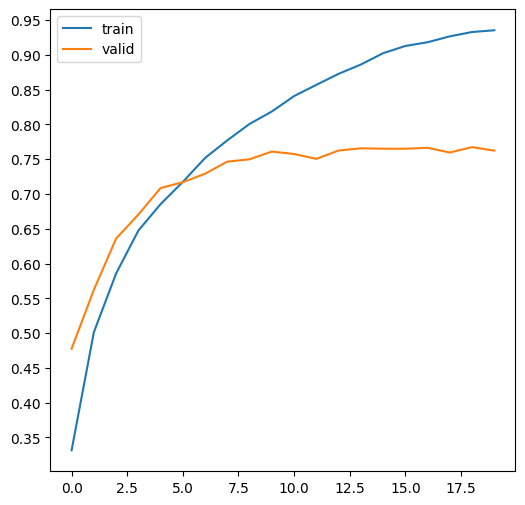

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.yticks(np.arange(0, 1, 0.05))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='valid')
plt.legend()


# epoch가 10 이상부터는 과적합 가능성이 있다고 판단 가능 -> epoch 수를 줄이거나 모델 층을 좀 더 복잡한 것에서 가볍게 쌓는 것으로 변환

In [ ]:
# 테스트 데이터로 성능 평가
model.evaluate(test_images_2, test_labels_2)

313/313 [==============================] - 1s 3ms/step - loss: 1.0057 - accuracy: 0.7651


[1.0056532621383667, 0.7651000022888184]

In [ ]:
# 1. 한개의 값만 예측하고 싶을 때

# 테스트용 4차원 이미지 배열을 입력해서 predict()수행.
# predict()의 결과는 softmax 적용 결과임. 학습 데이터의 원-핫 인코딩 적용 여부와 관계없이 softmax 적용 결과는 무조건 2차원 임에 유의

preds = model.predict(np.expand_dims(test_images_2[0], axis=0))
print('예측 결과 shape:', preds.shape)
print('예측 결과:', preds.argmax())

#['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

1/1 [==============================] - 1s 1s/step
예측 결과 shape: (1, 10)
예측 결과: 3


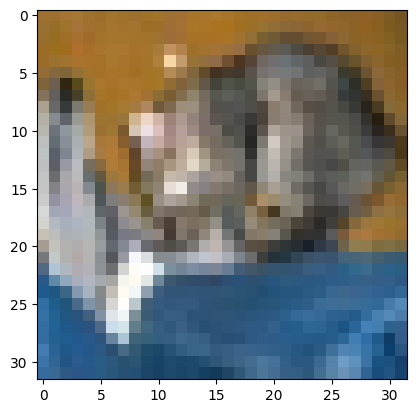

In [ ]:
plt.imshow(test_images_2[0])

In [ ]:
pred_y=model.predict(test_images_2).argmax(axis=1)
print(pred_y[:5])
print(test_labels_2[:5])

#['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

313/313 [==============================] - 1s 3ms/step
[3 8 8 0 6]
[3 8 8 0 6]


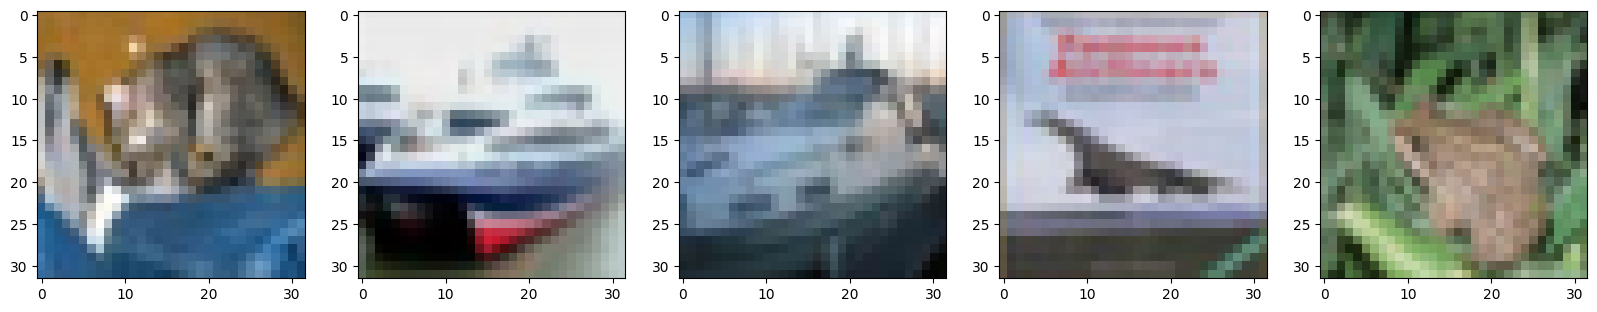

In [ ]:
# 여러개의 그림을 한번에 표현하기

ncols = 5

figure, axs = plt.subplots(figsize=(20, 20), nrows=1, ncols=ncols) # subplots함수는 여러개의 그림을 한번에 표현하도록 도와줌

for i in range(ncols):
    axs[i].imshow(test_images_2[i], cmap='gray')